### FashionMINIST
We want to build a `torch` Neural Network that classifies different `10` classes of clothes using `FashionMNIST` dataset.

In [1]:
import torch
import torchvision
from torchvision import datasets, transforms
from matplotlib import pyplot as plt
import numpy as np

In [7]:
train = datasets.FashionMNIST('', train=True, download=True,
                              transform= transforms.Compose([
                                  transforms.ToTensor()
                            ]))
test = datasets.FashionMNIST('', train=False, download=True,
                              transform= transforms.Compose([
                                  transforms.ToTensor()
                            ]))

In [9]:
trainset = torch.utils.data.DataLoader(train, batch_size= 10, shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size= 10, shuffle=False)

> Now we have our `trainset` and `testset` we can move forward

In [45]:
for X in trainset:
    print(X)
    break

[tensor([[[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],


        [[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],


        [[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  .

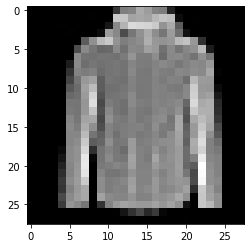

In [16]:
plt.imshow(data[0][1].view(28,28), cmap="gray")

### Neural Net Creation.

In [17]:
from torch import nn
import torch.nn.functional as F
import torch.optim as optim

In [39]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 16)
        self.fc5 = nn.Linear(16, 10)
        
    def forward(self, X):
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = F.relu(self.fc3(X))
        X = F.relu(self.fc4(X))
        X = F.log_softmax(self.fc5(X), dim=1)
        return X
net = Net()
net

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=16, bias=True)
  (fc5): Linear(in_features=16, out_features=10, bias=True)
)

### Training our NN.

In [40]:
loss = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

In [41]:
EPOCHS = 3

for epoch in range(EPOCHS):
    print(f'{epoch}/{EPOCHS}')
    for data in trainset:
        X, y = data
        net.zero_grad()
        output = net(X.view(-1, 28*28))
        loss = F.nll_loss(output, y)
        loss.backward()
        optimizer.step()
    print(loss)

0/3
tensor(0.6601, grad_fn=<NllLossBackward>)
1/3
tensor(0.6958, grad_fn=<NllLossBackward>)
2/3
tensor(0.1293, grad_fn=<NllLossBackward>)


### Model Evaluation
> We want to create a generic function that calculate the accuracy.

In [42]:
def evaluate(data):
    n_correct, n_total = 0, 0
    with torch.no_grad():
        for data_ in data:
            X, y = data_
            output = net(X.view(-1, 28*28))
            for i, j in enumerate(output):
                if y[i] == torch.argmax(j):
                    n_correct +=1
                n_total +=1
    print("Accuracy: ", n_correct / n_total)

In [43]:
print("TRAIN SET..")
evaluate(trainset)

print('TEST SET..')
evaluate(testset)

TRAIN SET..
Accuracy:  0.87585
TEST SET..
Accuracy:  0.8594


> `88%` accurate on the trainset and `86` on the test dataset.

#### Marking Predictions

In [44]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [50]:
X[0][0]

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

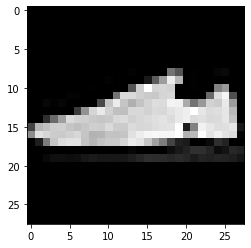

In [54]:
plt.imshow(X[0][0].view(28, 28), cmap="gray")

In [63]:
class_names[torch.argmax(net(X[0][0].view(-1, 28*28)))]

'Sneaker'

### Let's try to predict on a new image.

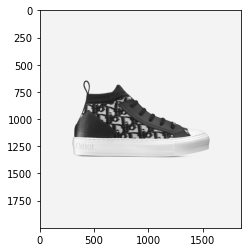

In [70]:
import cv2
image = cv2.imread('1.webp')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(image, cmap="gray")

> Our image must be resized to `28x28`

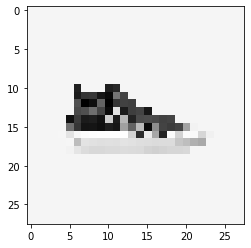

In [77]:
image = cv2.resize(image, dsize=(28,28))
plt.imshow(image, cmap="gray")

In [78]:
image = image[:]/255 # scalling the the image down

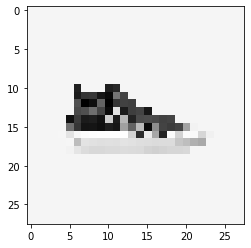

In [79]:
plt.imshow(image, cmap="gray")

In [82]:
class_names[torch.argmax(net(torch.tensor(image, dtype=torch.float32).view(-1, 28*28)))]

'Sandal'

> **Wrong prediction** a sneaker is not a sandal. 